# PROJET D'ANALYSE DE DONNEES WeRateDogs

# Table des matières

<ul>
<li><a href="#intro"/>Introduction</li>
<li><a href="#chargement"/>1. Chargement des librairies</li>
<li><a href="#rassembler"/>2. Rassembler les données</li>
<li><a href="#evaluer"/>3. Evaluattion des données</li>
<li><a href="#visioprogra"/>3.1 Evaluation visuelle et programmatique</li>
<li><a href="#structure"/>3.2 Problèmes de structures</li>
<li><a href="#qualité"/>3.3 Problèmes de qualités</li>
<li><a href="#nettoyer"/>4. Nettoyage des données</li>
<li><a href="#stocker"/>5. Stockage des données</li>
<li><a href="#analyser"/>6. Analyse et Visualisation des données</li>   
</ul>


<a id='intro'></a>
## Introduction

### A propos

L'ensemble des données que nous allons traiter (analyser et visualiser) est l'archive de tweets de l'utilisateur de Twitter **@dog_rates**, également connu sous le nom de **WeRateDogs.** WeRateDogs est un compte Twitter qui évalue les chiens des gens avec un commentaire humoristique sur le chien. Ces notes ont presque toujours un dénominateur de 10. Mais les numérateurs presque toujours supérieur à 10. 11/10, 12/10, 13/10, etc. Pourquoi ? Parce que « ce sont les chiens de Brent ». WeRateDogs compte plus de 4 millions d'abonnés et a reçu une couverture médiatique internationale. 

### Les données

Dans le cadre de ce projet, nous travaillerons sur les trois ensembles de données suivants :

### A. Archives Twitter améliorées

Les archives Twitter de WeRateDogs contiennent des données de base sur les 5000 tweets et plus, mais par sur tout. Une colonne de l'archive contient : le texte de chaque tweet, utilisé pour extraire la note, le nom du chien et les « étapes » du chien (doggo, floofer, pupper et puppo) pour rendre cette archive Twitter « améliorée ». Les tweets avec des notes sont filtés seulement sur les 5000 tweets et plus.   

### B. Fichier de prédictions d'images

Chaque image de l'archive Twitter de WeRateDogs a été éxécuté par un réseau de neuronnes capable de classer les races des chiens. Les résultats : un tableau rempli de prédictions d'images avec l'ID de chaque tweet, l'URL de l'image et le numéro de l'image correspondant à la prédiction la plus sûre (numérotée de 1 à 4 puisque les tweets peuvent contenir jusqu'à quatre images).

### C. Données supplémentaires via l'API Twitter

Les données suppléméntaires sont collectées à partir de l'API de Twitter. Et parce que nous disposons de l'archive Twitter de WeRateDogs et plus particulièrement des ID des tweets qu'elle contient, nous pouvons collecter ces données pour les 5000 tweets et plus.

<a id='chargement'></a>
## 1. Chargement des librairies

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests

<a id='rassembler'></a>
## 2. Rassembler les données

### A. Importer Enhanced Twitter Archive

In [106]:
# Importation de df_twitter_archive
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### B. Importer le fichier de prédiction d'images

In [107]:
# Importation de df_image_prediction
df_image_prediction =pd.read_csv('image-predictions.tsv',sep='\t')

### C. Obenir les données supplémentaires via l'API Twitter

> Dans cette partie, pour des raisons de temps nous n'allons pas éxécuter ce code pour récupérer les données via l'API Twitter.

In [108]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# consumer_key = 'xxxx'
# consumer_secret = 'xxxx'
# access_token = 'xxxx'
# access_secret = 'xxxx'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()

# Save each tweet's returned JSON as a new line in a .txt file

# with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    # for tweet_id in tweet_ids:
        # count += 1
        # print(str(count) + ": " + str(tweet_id))
        # try:
            # tweet = api.get_status(tweet_id, tweet_mode='extended')
            # print("Success")
            # json.dump(tweet._json, outfile)
            # outfile.write('\n')
        # except tweepy.errors.HTTPException as e:
            # print("Fail")
            # fails_dict[tweet_id] = e
            # pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [109]:
# Importation de df_tweet_json
df_tweet_json = pd.read_json('tweet-json.txt', encoding = "utf8", lines = True)

In [110]:
# Différentes colonnes de df_tweet_json
df_tweet_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [111]:
# Créer un dataframe à partir de df_tweet_json contenant id, retweet_count et favorite_count
df_tweet = pd.DataFrame(df_tweet_json, columns = ['id',
                                                 'retweet_count',
                                                 'favorite_count'])

In [113]:
# Afficher les 05 premières observations de df_weet
df_tweet.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [114]:
# Changer id de df_tweet par tweet_id
df_tweet = df_tweet.rename(columns = {'id':'tweet_id'})
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [115]:
# Sauvegarder df_tweet sous un format csv
df_tweet.to_csv('df_tweet.csv', index = False)

In [116]:
# Vérifier si le fichier est bien enrégistrer sous format csv
df_tweet_data = pd.read_csv('df_tweet.csv')
df_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='evaluer'></a>
## 3. Evaluation des données

<a id='visioprogra'></a>
### 3.1 Evaluation visuelle et programmatique

**L'évaluation visuelle** consiste à examiner un tableau de données dans un Jupyter notebook ou une feuille de calcul.

**L'évaluation programmatique** utilise des fonctions et des méthodes pour révéler la qualité et la propreté de nos données.

### A. Evaluation des données des Archives de Twitter Améliorées

In [117]:
# Observer les cinq (05) premières observations de df_twitter_archive
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [118]:
# Afficher dix (10) observations par hasard de df_twitter_archive
df_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
1886,674790488185167872,NaN,NaN,2015-12-10 03:19:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ER... MER... GERD 13/10 https://t.co/L1puJISV1a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674790488...,13,10,None,None,None,None,None
1637,684195085588783105,NaN,NaN,2016-01-05 02:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684195085...,9,10,Tino,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2290,667171260800061440,NaN,NaN,2015-11-19 02:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kenneth. He likes Reese's Puffs. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667171260...,10,10,Kenneth,None,None,None,None


In [119]:
# Dimensions de df_twitter_archive
df_twitter_archive.shape

(2356, 17)

In [120]:
# Nom des différentes variables de df_twitter_archive
df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [121]:
# Afficher le nombre total d'observation de chaque colonne et leurs types
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [122]:
# Statistique descriptive de rating_numerator de df_twitter_archive
df_twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [123]:
# Les différentes valeures prises par rating_denominator 
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [124]:
# Les différentes valeures prises par rating_numerator 
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [125]:
# Nombre de chiens ayant une note en dessous de 10
df_twitter_archive[df_twitter_archive.rating_numerator <10].count()[0]

440

In [126]:
# Afficher l'identifiant des chiens qui ont une note en dessous de 10
df_twitter_archive[df_twitter_archive.rating_numerator <10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [127]:
# Vérifier rating_numerator de tweet_id 666020888022790149
df_twitter_archive.loc[(df_twitter_archive.tweet_id == 666020888022790149), 'rating_numerator']

2355    8
Name: rating_numerator, dtype: int64

In [128]:
# Vérifier le texte du tweet_id 666020888022790149
df_twitter_archive.loc[2355, 'text']

'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'

In [129]:
# Statistique descriptive de rating_denominator de df_twitter_archive
df_twitter_archive['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [130]:
# Vérification de l'identifiant du chien ayant un dénominateur 0
df_twitter_archive[df_twitter_archive.rating_denominator == 0].tweet_id

313    835246439529840640
Name: tweet_id, dtype: int64

In [131]:
# Vérifier le texte du tweet_id 835246439529840640
df_twitter_archive.loc[313, 'text']

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [132]:
# Compter le nombre de chien ayant comme note au dénominateur différent de 10
df_twitter_archive[df_twitter_archive.rating_denominator != 10].count()[0]

23

In [133]:
# Afficher les noms des chiens de df_twitter_archive
df_twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [134]:
df_twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [135]:
# Type de timestamp
type(df_twitter_archive.timestamp[0])

str

In [136]:
# Somme de valeurs dupliquées
df_twitter_archive.duplicated().sum()

0

### B. Evaluation des données de prédictions d'images

In [137]:
# Afficher les (05) premières observations de df_image_prediction
df_image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [138]:
# Afficher par hasard dix (10) observations de df_image_prediction
df_image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1938,860524505164394496,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,Bedlington_terrier,0.286558,True,toy_poodle,0.235193,True,Lakeland_terrier,0.087951,True
209,669972011175813120,https://pbs.twimg.com/media/CUw3_QiUEAA8cT9.jpg,1,teddy,0.953071,False,koala,0.007027,False,fur_coat,0.005368,False
583,678800283649069056,https://pbs.twimg.com/media/CWuVQSLW4AAI3w9.jpg,1,Labrador_retriever,0.213673,True,beagle,0.146235,True,Airedale,0.122701,True
1842,838476387338051585,https://pbs.twimg.com/media/C6Ld0wYWgAQQqMC.jpg,3,Great_Pyrenees,0.997692,True,kuvasz,0.001001,True,Newfoundland,0.000405,True
548,677334615166730240,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True
1636,806242860592926720,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
137,668528771708952576,https://pbs.twimg.com/media/CUcXXpxWUAAUJ__.jpg,1,Labrador_retriever,0.195835,True,kuvasz,0.121607,True,English_setter,0.081464,True
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,Samoyed,0.215967,True,Siberian_husky,0.077500,True
1682,813910438903693312,https://pbs.twimg.com/media/C0uXObSXUAAIzmV.jpg,1,Siberian_husky,0.699355,True,Eskimo_dog,0.256433,True,Norwegian_elkhound,0.013189,True
1529,789268448748703744,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,1,malamute,0.812860,True,Siberian_husky,0.120853,True,Eskimo_dog,0.024269,True


In [139]:
# Dimension de df_image_prediction
df_image_prediction.shape

(2075, 12)

In [140]:
# Nom des différentes colonnes de df_image_prediction
df_image_prediction.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [141]:
df_image_prediction.loc[1312, 'jpg_url']

'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg'

In [142]:
from IPython.display import Image
Image(url = 'https://pbs.twimg.com/ext_tw_video_thumb/754481405627957248/pu/img/YY1eBDOlP9QFC4Bj.jpg')

In [143]:
# Observer les manquants et le type des variables de df_image_prediction
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [144]:
# Type de jpg_url
type(df_image_prediction.jpg_url[0])

str

In [145]:
# Les valeurs dupliquées
df_image_prediction.duplicated().sum()

0

### C. Evaluation des Tweets via l'API Twitter

In [146]:
# Les premières observations de df_tweet_data
df_tweet_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [147]:
# 05 observations par hasard de df_tweet_data
df_tweet_data.sample(5)

,tweet_id,retweet_count,favorite_count
1172,720059472081784833,1268,4229
218,850145622816686080,4244,17519
2203,668633411083464705,1788,3024
1731,679777920601223168,1281,3390
1135,728046963732717569,1328,4722


In [148]:
# Dimension de df_tweet_data
df_tweet_data.shape

(2354, 3)

In [149]:
# Nom des différentes colonnes de df_tweet_data
df_tweet_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

In [150]:
# Les manquants et type de df_tweet_data
df_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


Nous allons à présent identifier les problèmes de structure et de qualité des trois (03) bases de données puis passer au nettoyage proprement parlé.

<a id='structure'></a>
### 3.2 Problèmes de structures

- Les noms des espéces de chiens (doggo, floofer, pupper, puppo) sont séparés en quatre (04) colonnes différentes.
- Toutes ces bases de données sont liées mais séparées en trois (03) bases de données distinctes.

<a id='qualité'></a>
### 3.3 Problèmes de qualités

### A. Base des Archives de Twitter Améliorées

- Il y a 181 retweets comme indique retweeted_status_id.
- Le type de tweet_id doit être une chaîne au lieu d'un entier.
- Timestamp devrait être sous format date (datetime).
- Certains identifiants des chiens ont des photos manquantes.
- Certaines valeurs (440) dans la colonne rating_denominator ne sont pas 10.
- Quelques valeurs dans la colonne rating_numerator sont inférieures à 10.
- Quelques valeurs dans la colonne rating_numerator sont égales à zéro
- retweeted_status_timestamp doit être supprimé car nous nous intéressons au tweet.
- Les Valeurs nulles sont représentées par (None) dans la colonne name.
- certaines des lignes expand_urls ont 2 URL et nous avons juste besoin d'un lien tweeter.
- 59 valeurs manquantes dans la colonne expanded_urls.

### B. Base des Tweets de Prédictions d'Image

- Certaines lettres en p commencent par une lettre majuscule tandis que d'autres sont en minuscule.
- tweet_id doit être une chaine de caractère et non un entier.

### C. Base des Tweets via l'API de Tweeter

- Le nom des identifiants des colonnes doit être tweet_id au lieu de id.
- tweet_id doit être une chaîne et non un entier.

<a id='nettoyer'></a>
## 4. Nettoyage des données

### A. Copies des données

In [151]:
# Copie de chacunes de ces bases
clean_archive = df_twitter_archive.copy()
clean_image = df_image_prediction.copy()
clean_tweet = df_tweet_data.copy()

In [152]:
# Observation de clean_archive
clean_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [153]:
# Observation de clean_image
clean_image.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [154]:
# Observation de clean_tweet
clean_tweet.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


### B. Résolution des Problèmes de Structures


- **Les noms des espéces de chiens (doggo, floofer, pupper, puppo) sont séparés en quatre (04) colonnes différentes.** 

#### Définir

Combiner les quatre (04) colonnes en une seule appelée dog_stage.

#### Coder

In [155]:
# Combiner les (04) colonnes
clean_archive['dog_stage'] = clean_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN


In [156]:
# Supprimer les colonnes doggo floofer pupper et puppo
clean_archive = clean_archive.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

#### Tester

In [157]:
# Nom des variables désormais de clean_archive
clean_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [158]:
# Les différentes catégories de dog_stage
clean_archive['dog_stage'].value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

- **Toutes nos données sont liées mais séparées en trois (03) bases de données.**

#### Définir

Combiner ces (03) dataframes en une seule base.

#### Coder

In [159]:
# Fusionner les bases clean_archive et clean_tweet
clean_archive_df = pd.merge(clean_archive, clean_tweet, on = 'tweet_id', how = 'left')

In [160]:
# Fusionner clean_df et clean_image
clean_archive_data = pd.merge(clean_archive_df, clean_image, on = 'tweet_id', how = 'left')

#### Tester

In [161]:
# Description sommaire de clean_archive_data
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   399 n

### C. Résolution des Problèmes de Qualités

- **Il y a 181 retweets comme indique retweeted_status_id.**

#### Définir

Supprimer les lignes retweetées (retweets) et toutes les colonnes associées.

#### Coder

In [162]:
clean_archive_data = clean_archive_data[clean_archive_data.retweeted_status_id.isnull()]
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   364 n

In [163]:
# Supprimer toutes les colonnes associées
clean_archive_data = clean_archive_data.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Tester

In [164]:
# Description sommaire de clean_archive_data
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

- **Le type de tweet_id doit être une chaîne de caractère au lieu d'un entier.**

#### Définir

Convertissons tweet_id en chaîne.

#### Coder

In [165]:
# Convertir tweet_id en chaîne de caractère
clean_archive_data.tweet_id = clean_archive_data.tweet_id.astype(str)

#### Tester

In [166]:
# Vérifier alors le type de tweet_id
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

- **Timestamp doit être en format date.**

#### Définir

Converir timestamp sous format date.

#### Coder

In [167]:
# Conversion de timestamp en format date
clean_archive_data.timestamp = pd.to_datetime(clean_archive_data.timestamp)

#### Tester

In [168]:
# Type de données
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  dog_stage              364 non-null    object             
 11  retweet_count          2175 non-null   float64          

- **Certains identifiant des chiens ont des photos manquantes.**

#### Définir

Supprimer les lignes des identifiants n'ayant pas de photos.

#### Coder

In [169]:
# Supprimons les lignes des identifiants sans photos
clean_archive_data = clean_archive_data[clean_archive_data.jpg_url.notnull()]

#### Tester

In [170]:
# Types et manquants de clean_archive_data
clean_archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              326 non-null    object             
 11  retweet_count          1994 non-null   float64          

- **Certaines valeurs dans la colonne rating_denominator ne sont pas 10.**

#### Définir

Remplacer les valeurs de tout nombre inférieur à 10 par 10.

#### Coder

In [171]:
# Remplacer toutes valeurs inférieur à 10 par 10
clean_archive_data.rating_denominator = clean_archive_data.rating_denominator.replace( range(0,1000) , 10 )  

#### Tester

In [172]:
# Afficher les valeurs de rating_denominator
clean_archive_data.rating_denominator.value_counts()

10    1994
Name: rating_denominator, dtype: int64

- **Quelques valeurs dans la colonne rating_numerator sont inférieures à 10.**
- **Quelques valeurs dans la colonne rating_numerator sont égales à 0.**

#### Définir

Ajouter 10 à toutes ces valeurs.

#### Coder

In [173]:
# Ajouter 10 à chacunes de ces valeurs 
clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ] = clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ].add(10)

C:\Users\Amen ANONWODJI\AppData\Local\Temp\ipykernel_14664\3733616637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ] = clean_archive_data.rating_numerator[clean_archive_data['rating_numerator'] <= 10 ].add(10)


#### Tester

In [174]:
# Afficher les différentes valeurs de rating_numerator
clean_archive_data.rating_numerator.value_counts()

12      459
20      419
11      401
13      280
19      151
18       95
17       52
14       51
15       33
16       32
10        2
60        1
44        1
143       1
26        1
121       1
80        1
144       1
88        1
45        1
165       1
99        1
50        1
204       1
1776      1
27        1
75        1
24        1
84        1
420       1
Name: rating_numerator, dtype: int64

In [175]:
clean_archive_data.query('rating_numerator <= 10 ').rating_numerator.sum()

20

- **Les Valeurs nulles sont représentées par (None) dans la colonne name.**

#### Définir

Remplacez ces valeurs par des valeurs nulles en utilisant la méthode de remplacement et la méthode numpy nan.

#### Coder

In [176]:
clean_archive_data.name = df_twitter_archive.name.replace("None", value = np.nan )

#### Tester

In [177]:
clean_archive_data.name.isnull().sum()

546

- **Certaines lettres en p commencent par une lettre majuscule tandis que d'autres sont en minuscule.**

#### Définir

Convertir les lettres miniscules en majuscules.

#### Coder

In [178]:
# Conversion
clean_archive_data.p1 = clean_archive_data.p1.str.replace('_', ' ')
clean_archive_data.p2 = clean_archive_data.p2.str.replace('_', ' ')
clean_archive_data.p3 = clean_archive_data.p3.str.replace('_', ' ')

#### Tester

In [179]:
clean_archive_data.p1.head(5)

0         orange
1      Chihuahua
2      Chihuahua
3    paper towel
4         basset
Name: p1, dtype: object

In [180]:
clean_archive_data.p2.head(5)

0                 bagel
1              Pekinese
2              malamute
3    Labrador retriever
4      English springer
Name: p2, dtype: object

In [181]:
clean_archive_data.p3.head(5)

0                         banana
1                       papillon
2                         kelpie
3                        spatula
4    German short-haired pointer
Name: p3, dtype: object

<a id='stocker'></a>
## 5. Stockage de données

In [182]:
# Enrégistrer sous format csv au nom de twitter_archive.csv
clean_archive_data.to_csv('twitter_archive_master.csv')

<a id='analyser'></a>
## 6. Analyse de données et Visualisation

### A. Pourcentage des différentes espèces de chien

In [183]:
stage_df = clean_archive_data.dog_stage.value_counts()
stage_df

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

In [184]:
# Importation de la librairie seaborn
import seaborn as sns
sns.set_theme()

(-1.1843354479570871,
 1.4181703555081837,
 -1.3332815068549735,
 1.2056899407062442)

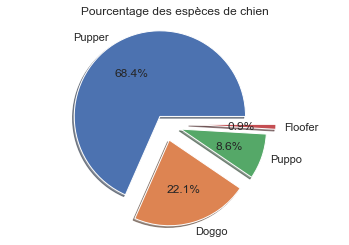

In [185]:
# Diagramme circulaire 
plt.pie(stage_df,
       labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer'],
       autopct = '%1.1f%%',
       shadow = True,
       explode = (0.1, 0.2, 0.2, 0.3))

plt.title('Pourcentage des espèces de chien')
plt.axis('equal')

- Pupper est l'espèce de chien la plus représentée (68.4%).
- Floofer est l'espèce de chien la moins représentée (0.9%).

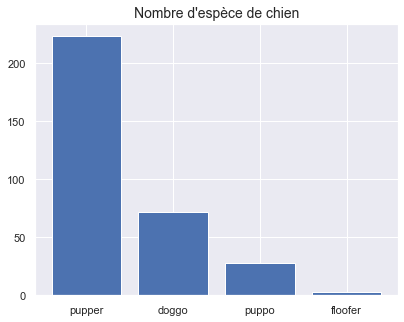

In [217]:
# Diagramme en barre 
plt.figure(figsize=(6.5,5))
plt.title("Nombre d'espèce de chien", fontsize=14)
plt.bar(x=clean_archive_data['dog_stage'].value_counts().index,
        height=clean_archive_data.dog_stage.value_counts().values);

- D'après le diagramme en barre également représenté, on voit clairement que Pupper est la plus représenté. Par contre Floofer est la moins représenté.

### B. Distribution des colonnes numériques

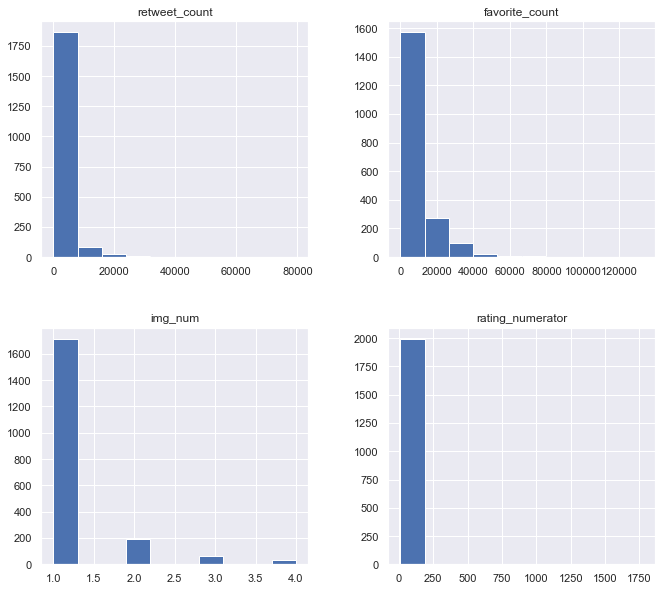

In [216]:
# Découvrons les colonnes numériques plus facilement
df_numeric = clean_archive_data[['retweet_count', 'favorite_count', 'img_num', 'rating_numerator']]
df_numeric.hist(figsize = (11,10));

- Toutes les variables numériques ont une distribution asymétrique à droite, ce qui signifie que les valeurs les plus faibles se sont produites le plus.

### C. Relations et coefficient de corrélation entre les variables numériques.

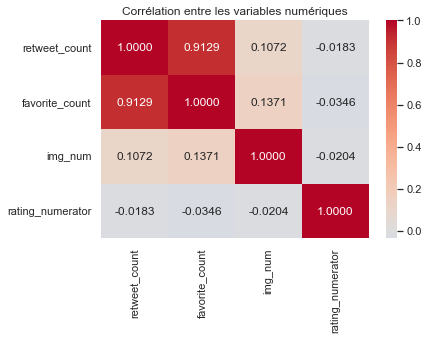

In [212]:
# Tracez une carte thermique pour montrer la corrélation entre les variables numériques et utilisez une palette divergente.
sns.heatmap(df_numeric.corr(), annot = True, fmt = '.4f', cmap = 'coolwarm', center = 0);
plt.title('Corrélation entre les variables numériques');

- La seule relation que nous pouvons mentionner ici est la forte corrélation positive entre le nombre de retweets et le nombre de favoris. et cela a du sens.

### D. Relation entre Retweet Count et Favorite Count

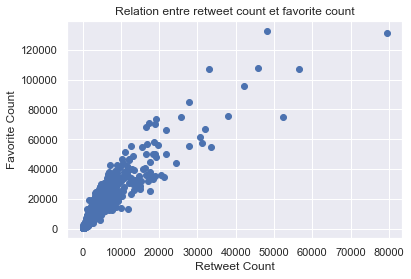

In [187]:
# Nuage de point montrant la relation entre retweet count et favorite count
plt.scatter(clean_archive_data.retweet_count, clean_archive_data.favorite_count)
plt.title('Relation entre retweet count et favorite count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

- Il y a donc une relation linéaire entre ces deux paramètres.

### E. L'impact du temps sur les retweets et les favoris compte.

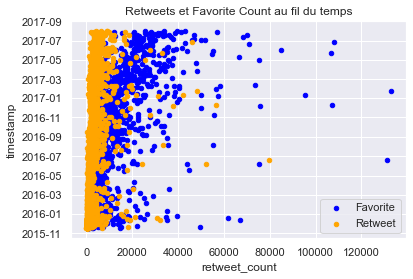

In [191]:
# diagrammes de dispersion dans un graphique pour montrer la relation entre le nombre de retweets et de favoris au fil du temps.

favorite = clean_archive_data.plot(kind='scatter', y='timestamp', x='favorite_count', color='blue')    
retweet = clean_archive_data.plot(kind='scatter', y='timestamp', x='retweet_count', color='orange', ax=favorite)    

#Titles and labels
plt.title('Retweets et Favorite Count au fil du temps')
plt.legend(["Favorite", "Retweet"]);

- Le nombre de favoris est toujours supérieur au nombre de retweets.
- Il y a une légère augmentation des favoris et des retweets au fil du temps.
- Le plus grand nombre de retweets était d'environ 75 000 et c'était en juin 2016.